In [134]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely import geometry as gm
from sklearn.preprocessing import MinMaxScaler
import warnings
import matplotlib as plot
from sklearn.cluster import KMeans
import numpy as np
import random as rnd
warnings.filterwarnings('ignore')

In [154]:
points = gpd.read_file(r"SampleShapeFile/shape/points.shp")
points=points.to_crs('epsg:32644')
roads = gpd.read_file(r"SampleShapeFile/shape/roads.shp")
roads=roads.to_crs('epsg:32644')

In [4]:
hospitals= gpd.GeoDataFrame(points.loc[[1]],crs={'init':'epsg:32644'})
j=0
for i in range(len(points)): 
    if points.loc[i]['type'] == "hospital":
        hospitals=hospitals.append(points.loc[i])

<AxesSubplot:>

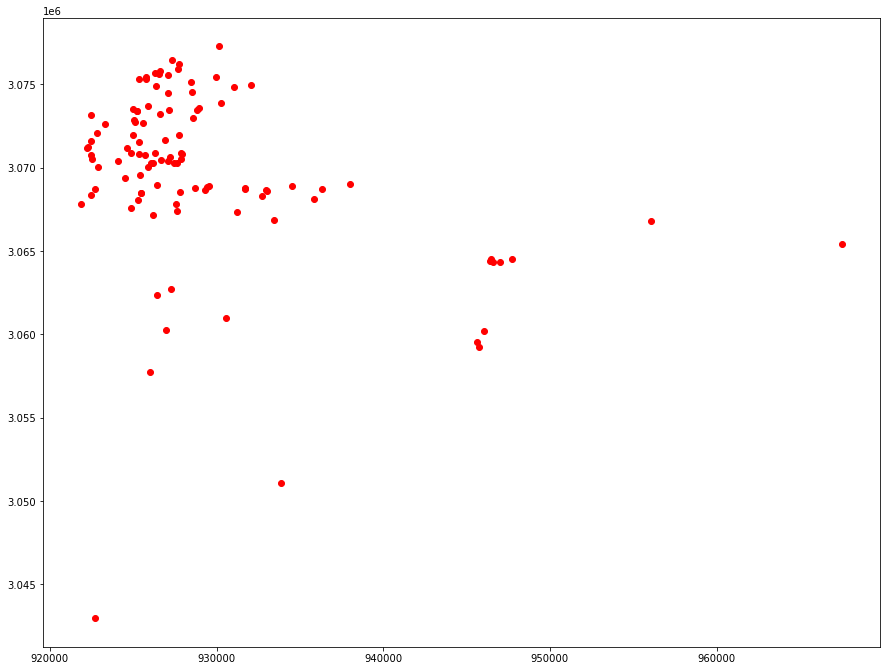

In [5]:
figure,ax1 = plt.subplots(figsize=(15,15))
hospitals.plot(ax=ax1,color='red')

In [6]:
buffer_zone1=hospitals.buffer(5000)

<AxesSubplot:>

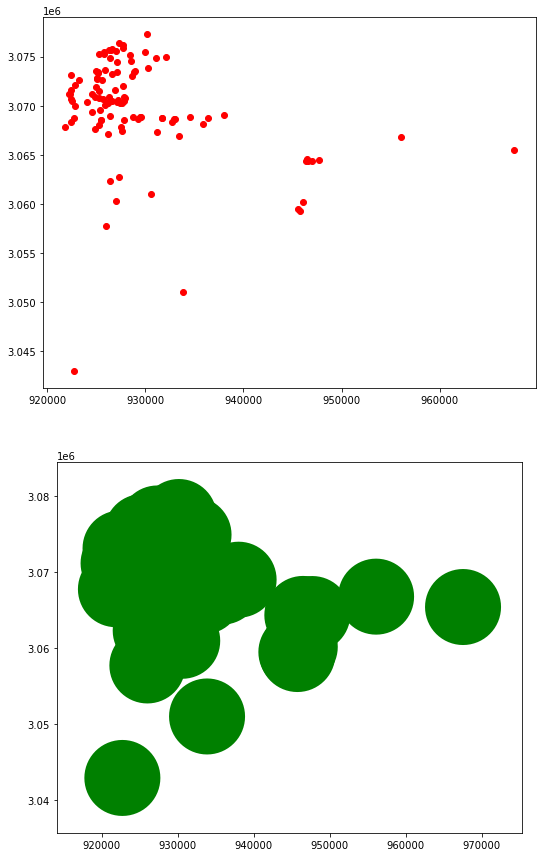

In [7]:
figure,(ax1,ax2)=plt.subplots(2,figsize=(15,15))
hospitals.plot(ax=ax1,color='red')
hospitals.plot(ax=ax2,color='blue')
buffer_zone1.plot(ax=ax2,color='green')

In [8]:
total_area=sum(buffer_zone1.area)

In [9]:
buffer_zone1=gpd.GeoDataFrame(geometry=gpd.GeoSeries(buffer_zone1))

In [10]:
buffer_zone1.drop_duplicates(inplace=True)

In [11]:
index = pd.Index(range(0,107))
buffer_zone1=buffer_zone1.set_index(index)
buffer_zone1

,geometry
0,"POLYGON ((940856.281 3068130.457, 940832.205 3..."
1,"POLYGON ((930220.208 3073407.789, 930196.131 3..."
2,"POLYGON ((950735.389 3059262.432, 950711.313 3..."
3,"POLYGON ((928278.237 3072617.774, 928254.161 3..."
4,"POLYGON ((951563.950 3064361.937, 951539.874 3..."
...,...
102,"POLYGON ((927433.543 3068372.762, 927409.467 3..."
103,"POLYGON ((927707.064 3068747.144, 927682.987 3..."
104,"POLYGON ((931614.902 3073195.150, 931590.826 3..."
105,"POLYGON ((951474.921 3064538.613, 951450.844 3..."


In [12]:
merged=buffer_zone1.loc[[0]]

In [13]:
for i in range(len(buffer_zone1)):
    merged=gpd.overlay(merged,buffer_zone1.loc[[i]],how='union')
    merged['column']=1
    merged=merged.dissolve()
    merged.crs='epsg:32644'

<AxesSubplot:>

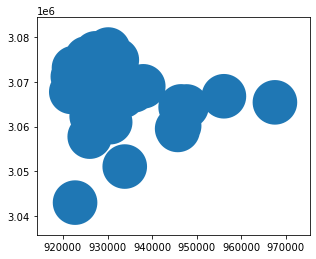

In [14]:
merged.plot()

In [15]:
olygon=gm.Polygon([[85.271,27.413],[85.868,27.408],[85.877,27.75],[85.272,27.753]])

In [16]:
d = { 'geometry': [olygon]}
rectangle=gpd.GeoDataFrame(d,crs={'init':'epsg:4326'})

<AxesSubplot:>

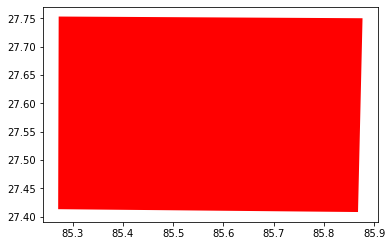

In [17]:
rectangle.plot(color='red')

In [18]:
rectangle=rectangle.to_crs('epsg:32644')

<AxesSubplot:>

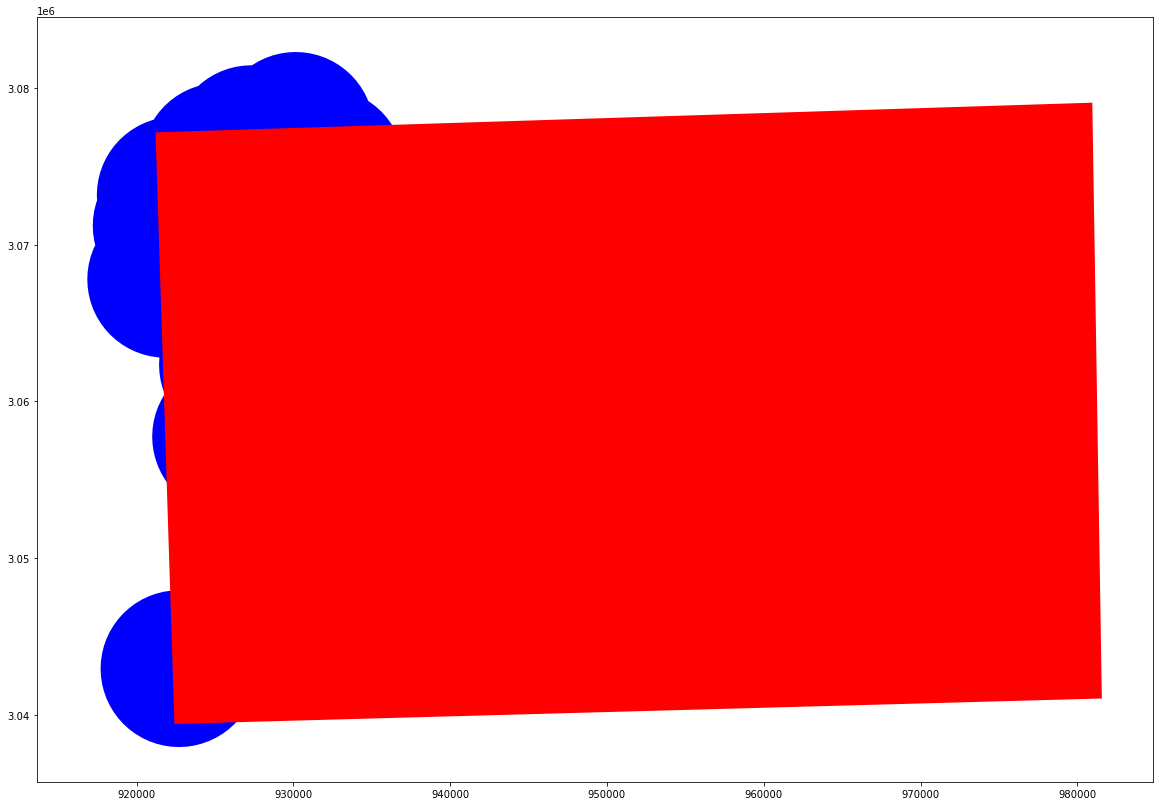

In [19]:
figure,ax=plt.subplots(figsize=(20,20))
merged.plot(ax=ax,color='blue')
rectangle.plot(ax=ax,color="red")


<AxesSubplot:>

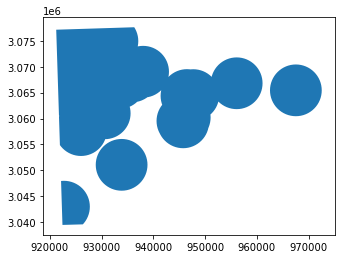

In [20]:
buffer_in_rectangle=gpd.clip(merged,rectangle)
buffer_in_rectangle.plot()

In [21]:
non_buffer=gpd.overlay(rectangle,merged,how='difference')

<AxesSubplot:>

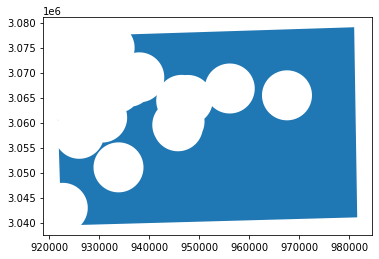

In [22]:
non_buffer.plot()

In [23]:
percentage=(merged.area)/(rectangle.area)*100
print("The percetange of total area with buffer_zone is {}".format(percentage))

The percetange of total area with buffer_zone is 0    42.000346
dtype: float64


In [24]:
buildings = gpd.read_file(r"SampleShapeFile/shape/buildings.shp")

In [25]:
buildings=buildings.to_crs('epsg:32644')
buildings=buildings.iloc[0:100000]

In [26]:
buildings_in_rectangle=gpd.clip(buildings,rectangle)

In [27]:
buildings_in_rectangle

,osm_id,name,type,geometry
96866,328392171,None,None,"POLYGON ((923209.442 3047755.386, 923213.295 3..."
67611,236112942,None,None,"POLYGON ((967979.800 3049642.211, 967999.530 3..."
67616,236112947,None,None,"POLYGON ((967938.239 3049679.268, 967940.204 3..."
67615,236112946,None,None,"POLYGON ((967873.176 3049704.679, 967892.696 3..."
67617,236112948,None,None,"POLYGON ((967855.137 3049710.625, 967860.027 3..."
...,...,...,...,...
58114,225240581,None,school,"POLYGON ((943440.263 3077643.049, 943450.313 3..."
58112,225240578,None,school,"POLYGON ((943436.380 3077655.963, 943443.364 3..."
58115,225240582,None,school,"POLYGON ((943411.534 3077657.942, 943418.563 3..."
58117,225240584,None,school,"POLYGON ((943421.236 3077659.187, 943436.537 3..."


In [354]:
buildings_in_buffer=gpd.clip(buildings,buffer_in_rectangle)

<AxesSubplot:>

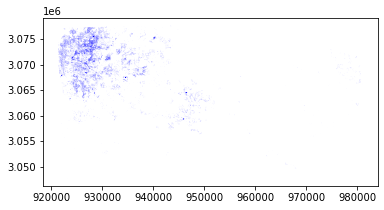

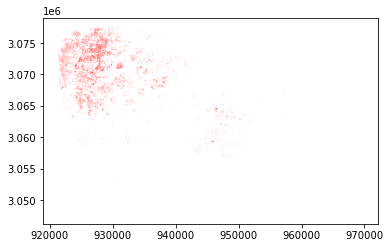

In [241]:
buildings_in_rectangle.plot(color="blue")
buildings_in_buffer.plot(color="red")

In [29]:
percentage_of_buildings_in_buffer=len(buildings_in_buffer)/len(buildings_in_rectangle)*100

In [30]:
print(percentage_of_buildings_in_buffer)

97.092


<AxesSubplot:>

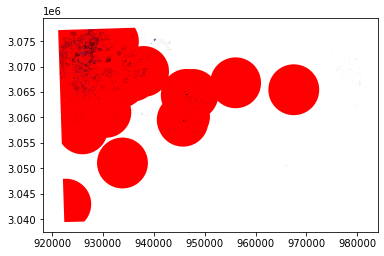

In [31]:
figure,ax=plt.subplots()
buffer_in_rectangle.plot(ax=ax,color="red",markersize=0.001)
buildings.plot(ax=ax,markersize=0.010)

In [248]:
buildings_outsidse_buffer=gpd.clip(buildings_in_rectangle,non_buffer)

<AxesSubplot:>

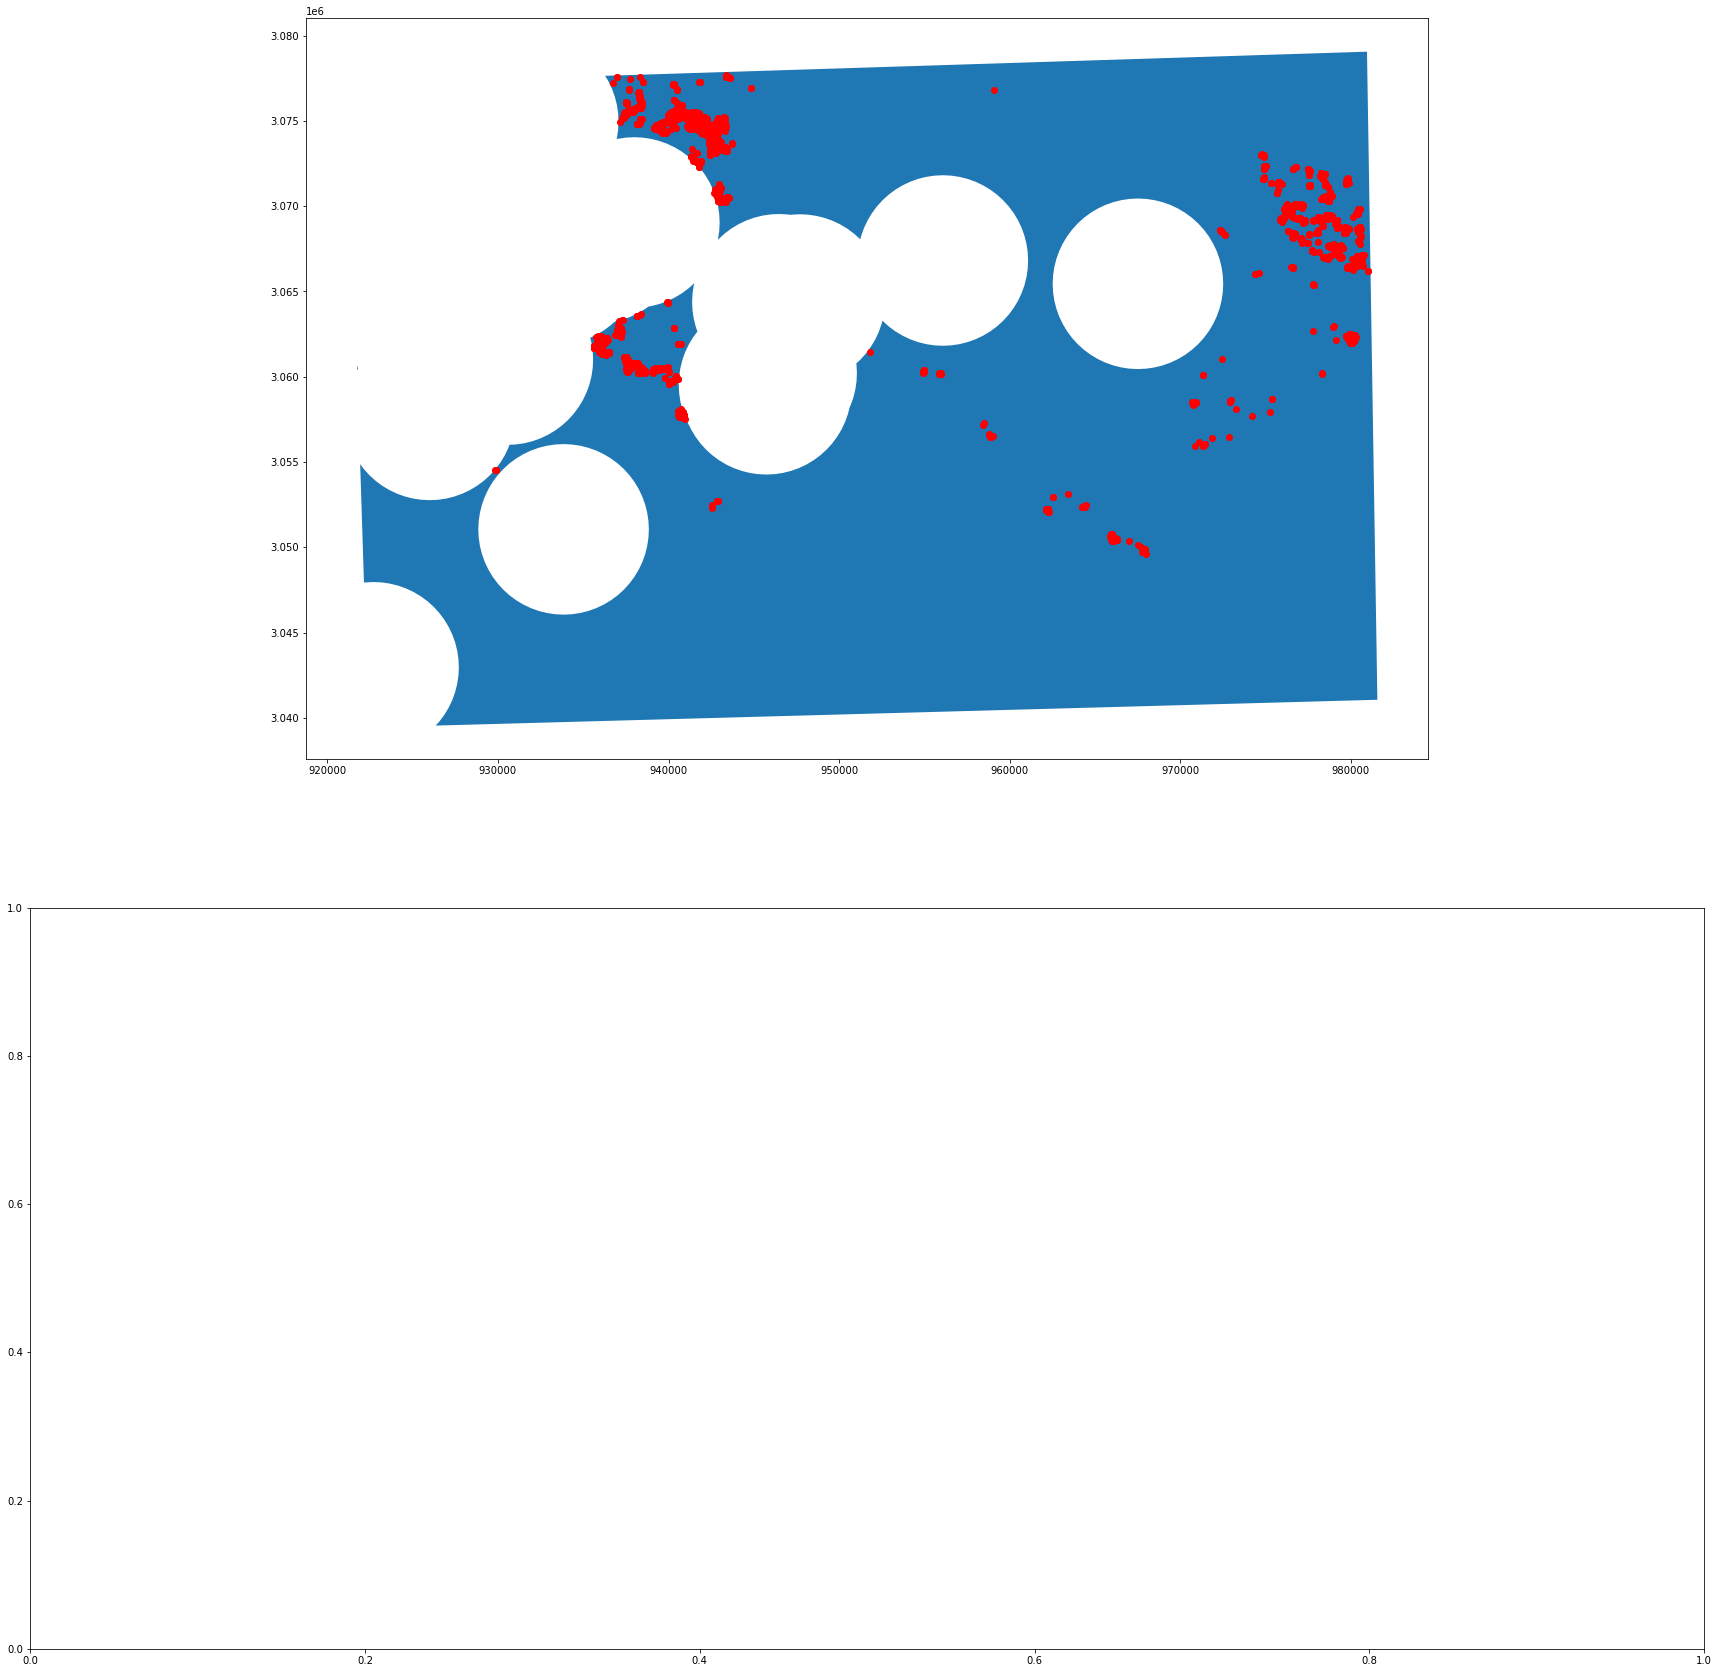

In [355]:
figure,(ax1,ax2)=plt.subplots(2,figsize=(30,30))
non_buffer.plot(ax=ax1)
buildings_outsidse_buffer.plot(ax=ax1,color="red")

In [255]:
buildings_outsidse_buffer

,osm_id,name,type,geometry
67611,236112942,None,None,"POLYGON ((967979.800 3049642.211, 967999.530 3..."
67616,236112947,None,None,"POLYGON ((967938.239 3049679.268, 967940.204 3..."
67615,236112946,None,None,"POLYGON ((967873.176 3049704.679, 967892.696 3..."
67617,236112948,None,None,"POLYGON ((967855.137 3049710.625, 967860.027 3..."
67613,236112944,None,None,"POLYGON ((967842.084 3049721.241, 967848.529 3..."
...,...,...,...,...
58114,225240581,None,school,"POLYGON ((943440.263 3077643.049, 943450.313 3..."
58112,225240578,None,school,"POLYGON ((943436.380 3077655.963, 943443.364 3..."
58115,225240582,None,school,"POLYGON ((943411.534 3077657.942, 943418.563 3..."
58117,225240584,None,school,"POLYGON ((943421.236 3077659.187, 943436.537 3..."


<AxesSubplot:>

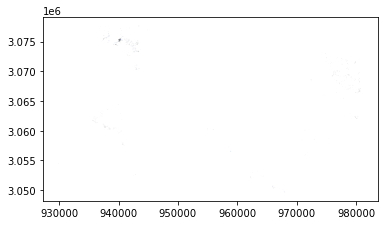

In [256]:
buildings_outsidse_buffer.plot()

In [257]:
buildings_outsidse_buffer['geometry']=buildings_outsidse_buffer['geometry'].centroid

<AxesSubplot:>

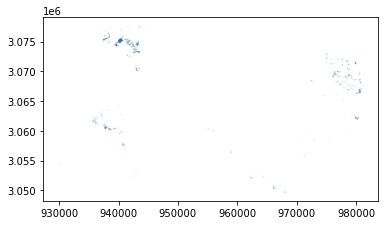

In [258]:
buildings_outsidse_buffer.plot(markersize=0.0002)

In [259]:
buildings_outsidse_buffer

,osm_id,name,type,geometry
67611,236112942,None,None,POINT (967987.668 3049633.064)
67616,236112947,None,None,POINT (967953.453 3049678.559)
67615,236112946,None,None,POINT (967880.257 3049694.247)
67617,236112948,None,None,POINT (967862.087 3049708.907)
67613,236112944,None,None,POINT (967850.720 3049719.053)
...,...,...,...,...
58114,225240581,None,school,POINT (943449.112 3077646.474)
58112,225240578,None,school,POINT (943439.370 3077651.911)
58115,225240582,None,school,POINT (943414.639 3077652.577)
58117,225240584,None,school,POINT (943428.258 3077653.677)


In [260]:
buildings_in_lat=buildings_outsidse_buffer.to_crs("epsg:4326")

In [353]:
buildings_in_lat

,osm_id,name,type,geometry
67611,236112942,None,None,POINT (85.73448 27.48987)
67616,236112947,None,None,POINT (85.73415 27.49029)
67615,236112946,None,None,POINT (85.73342 27.49046)
67617,236112948,None,None,POINT (85.73324 27.49060)
67613,236112944,None,None,POINT (85.73313 27.49069)
...,...,...,...,...
58114,225240581,None,school,POINT (85.49718 27.75021)
58112,225240578,None,school,POINT (85.49708 27.75026)
58115,225240582,None,school,POINT (85.49683 27.75028)
58117,225240584,None,school,POINT (85.49697 27.75028)


In [352]:
c= float(buildings_in_lat['geometry'].loc[[1]].x)

KeyError: "None of [Int64Index([1], dtype='int64')] are in the [index]"

In [ ]:
c

In [357]:
col1=[]
col2=[]

In [356]:
for i in range(len(buildings_in_lat)):
    x=float(buildings_in_lat['geometry'].loc[[i]].x)
    y=float(buildings_in_lat['geometry'].loc[[i]].y)
    col1.append(x)
    col2.append(y)

KeyError: "None of [Int64Index([0], dtype='int64')] are in the [index]"

In [263]:
d={'x':col1,'y':col2}


In [264]:
data=pd.DataFrame(data=d)

In [351]:
data_new=(data.copy())
data

,x,y,cluster
0,85.734482,27.489870,3
1,85.734155,27.490291,3
2,85.733422,27.490457,3
3,85.733245,27.490595,3
4,85.733134,27.490691,3
...,...,...,...
3001,85.497180,27.750210,5
3002,85.497083,27.750262,5
3003,85.496833,27.750276,5
3004,85.496971,27.750282,5


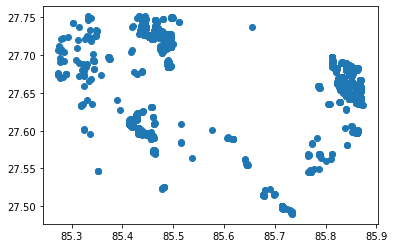

In [266]:
plt.scatter(data['x'],data['y'])

In [267]:
scaler=MinMaxScaler()
scaler.fit(data[['x']])
# newData = {'x':[], 'y':[]}
x=(scaler.transform(data[['x']]))
# newData.x= scaler.transform(data.x)
scaler.fit(data[['y']])
# newData.x= scaler.transform(data.y)

y=scaler.transform(data[['y']])
np.concatenate(x,axis=0)
np.concatenate(y,axis=0)
data_new['x']=x
data_new['y']=y

In [268]:
km=KMeans(n_clusters = 10)
km

KMeans(n_clusters=10)

In [269]:
predicted = km.fit_predict(data)
predicted

array([3, 3, 3, ..., 5, 5, 5])

In [270]:
data['cluster'] = predicted
data.head(20)

,x,y,cluster
0,85.734482,27.489870,3
1,85.734155,27.490291,3
2,85.733422,27.490457,3
3,85.733245,27.490595,3
4,85.733134,27.490691,3
5,85.733020,27.490810,3
6,85.732344,27.490870,3
7,85.732912,27.490910,3
8,85.733755,27.491749,3
9,85.733899,27.491821,3


In [271]:
data

,x,y,cluster
0,85.734482,27.489870,3
1,85.734155,27.490291,3
2,85.733422,27.490457,3
3,85.733245,27.490595,3
4,85.733134,27.490691,3
...,...,...,...
3001,85.497180,27.750210,5
3002,85.497083,27.750262,5
3003,85.496833,27.750276,5
3004,85.496971,27.750282,5


In [272]:
data_new.head()

,x,y
0,0.769463,0.000000
1,0.768917,0.001609
2,0.767694,0.002245
3,0.767398,0.002773
4,0.767213,0.003137


In [273]:
np.concatenate(x,axis=0)

array([0.7694633 , 0.76891655, 0.76769432, ..., 0.37287614, 0.37310673,
       0.37184498])

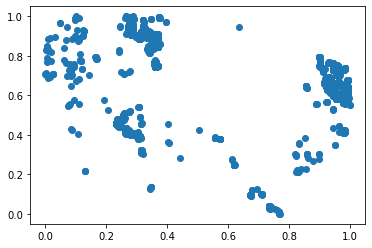

In [274]:
plt.scatter(data_new['x'],data_new['y'])

In [275]:
km = KMeans(n_clusters=10)
predicted =km.fit_predict(data_new)
predicted

array([3, 3, 3, ..., 0, 0, 0])

In [276]:
data_new['cluster'] =predicted
data_new.head(20)

,x,y,cluster
0,0.769463,0.000000,3
1,0.768917,0.001609,3
2,0.767694,0.002245,3
3,0.767398,0.002773,3
4,0.767213,0.003137,3
5,0.767023,0.003591,3
6,0.765894,0.003822,3
7,0.766843,0.003976,3
8,0.768249,0.007179,3
9,0.768490,0.007458,3


In [324]:
km=KMeans(n_clusters=150)

In [325]:
km.fit(data[['x','y']])

KMeans(n_clusters=150)

In [331]:
x=km.cluster_centers_
x=pd.DataFrame(x,columns=['x','y'])

In [332]:
x

,x,y
0,85.788266,27.567954
1,85.456641,27.723618
2,85.834741,27.669824
3,85.440349,27.596215
4,85.279607,27.693046
...,...,...
145,85.684042,27.521994
146,85.724786,27.496738
147,85.288025,27.674986
148,85.838648,27.603954


In [333]:
x_cord=x['x']
y_cord=x['y']

In [334]:
geometry=[]

In [335]:
for i in range(len(x_cord)):
    x=gm.Point(x_cord[i],y_cord[i])
    geometry.append(x)

In [336]:
x=gm.Point(x_cord[i],y_cord[i])

print(geometry)

In [339]:
points={'geometry':geometry}

In [340]:
Locations=gpd.GeoDataFrame(points,crs={'init':'epsg:4326'})

<AxesSubplot:>

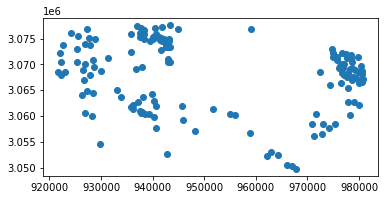

In [349]:
Locations.plot()

<AxesSubplot:>

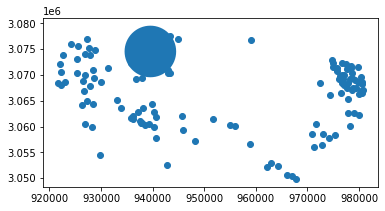